In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

In [4]:
import numpy as np

In [5]:
import pandas as pd
import os
import glob

In [6]:
dir_list = ["1_1","1_2","2_1","2_2","3_1","3_2"]

In [7]:
test_dir_list = ["1_3","1_4","1_5","1_6","1_7","2_3","2_4","2_5","2_6","2_7","3_3"]

### setting 2

In [6]:
one_train = pd.read_csv("three_train_combine.csv")

In [7]:
one_test = pd.read_csv("three_test_combine.csv")

In [8]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [9]:
one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [10]:
one_train["RUL_x"]

0         4270.09961
1         4270.09922
2         4270.09883
3         4270.09844
4         4270.09805
             ...    
109563       0.00156
109564       0.00117
109565       0.00078
109566       0.00039
109567       0.00000
Name: RUL_x, Length: 109568, dtype: float64

In [11]:
def two_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2,"time_group"] = 1
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [135]:
one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3

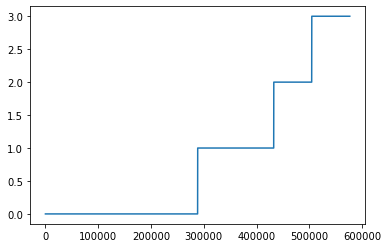

In [136]:
plt.plot(one_id["time_group"])

In [104]:
one_id.loc[0,"RUL_x"]*0.75

16890.07470675

In [12]:
def three_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]/2) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25,"time_group"] = 2
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [13]:
def four_time_group(one_train):
    time_group_list = []
    for i in range(1,int(one_train["id"].max())+1,1):
        one_id = one_train[one_train["id"]==i][["id","RUL_x"]]
        one_id = one_id.reset_index()
        one_id.loc[one_id["RUL_x"]>one_id.loc[0,"RUL_x"]/2,"time_group"] = 0
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.5) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.25),"time_group"] = 1
        one_id.loc[(one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.25) & (one_id["RUL_x"]>one_id.loc[0,"RUL_x"]*0.125),"time_group"] = 2 
        one_id.loc[one_id["RUL_x"]<one_id.loc[0,"RUL_x"]*0.125,"time_group"] = 3
        time_group_list = time_group_list + list(one_id["time_group"].values)
    one_train["time_group"] = time_group_list
    return one_train

In [14]:
one_train = two_time_group(one_train)

In [15]:
one_test = two_time_group(one_test)

In [16]:
one_train = clean_dataset(one_train)
one_test = clean_dataset(one_test)

In [17]:
one_train = one_train.reset_index()
one_test = one_test.reset_index()

In [18]:
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

In [20]:
X_train

,Horiz_acc,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,crest_horiz,clear_horiz,shape_horiz,...,av_temp,sd_temp,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp
0,-0.606,-0.035885,0.305700,0.595,0.301904,-0.020307,-0.203469,1.970825,16.688361,-8.413188,...,63.64025,0.070772,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630
1,0.283,-0.022923,0.311981,0.595,0.306780,-0.107927,-0.370114,1.939498,13.584765,-13.383039,...,63.64025,0.070772,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630
2,-0.085,-0.040731,0.301209,0.595,0.298155,-0.030118,-0.132409,1.995604,17.266136,-7.320149,...,63.64025,0.070772,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630
3,-0.216,-0.055154,0.300240,0.595,0.299531,0.104462,-0.093631,1.986440,20.516007,-5.430823,...,63.64025,0.070772,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630
4,0.588,-0.026231,0.324570,0.595,0.319346,0.131074,-0.325532,1.863181,14.906027,-12.174493,...,63.64025,0.070772,63.744,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109563,1.143,0.087846,1.105386,2.234,1.087474,-0.029527,-0.402650,2.054302,11.400122,12.379301,...,117.80450,0.025609,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395
109564,-0.119,0.085962,1.105708,2.234,1.087638,-0.024119,-0.405813,2.053993,11.400122,12.652609,...,117.80450,0.025609,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395
109565,1.270,0.207692,1.051802,2.234,1.052081,-0.054590,-0.347843,2.123411,9.457436,5.065575,...,117.80450,0.025609,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395
109566,1.201,0.289192,1.043148,2.234,1.062986,-0.218546,-0.253512,2.101627,8.008188,3.675705,...,117.80450,0.025609,117.851,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
def plot_features_weights(model, weights, feature_names):
    

    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W_df = W.sort_values(by='Weights', ascending=True)
    W_df.tail(10).plot(kind='barh', color='r', figsize=(px,py))
    plt.xlabel(model)
    plt.gca().legend_ = None

In [24]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    plt.figure(figsize=(20,10))
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=y_train.max()+50, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

In [25]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [27]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict)
test_f1 = f1_score(y_test, y_test_predict)
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 1.000, accuracy testing: 0.500
F1 training: 1.000, F1 testing: 0.000


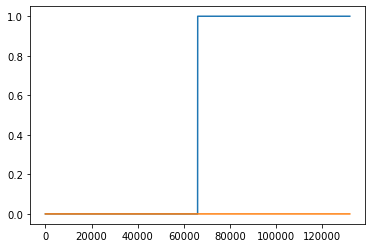

In [28]:
plt.plot(y_test)
plt.plot(y_test_predict)

In [29]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67     65919
         1.0       0.00      0.00      0.00     65919

    accuracy                           0.50    131838
   macro avg       0.25      0.50      0.33    131838
weighted avg       0.25      0.50      0.33    131838



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


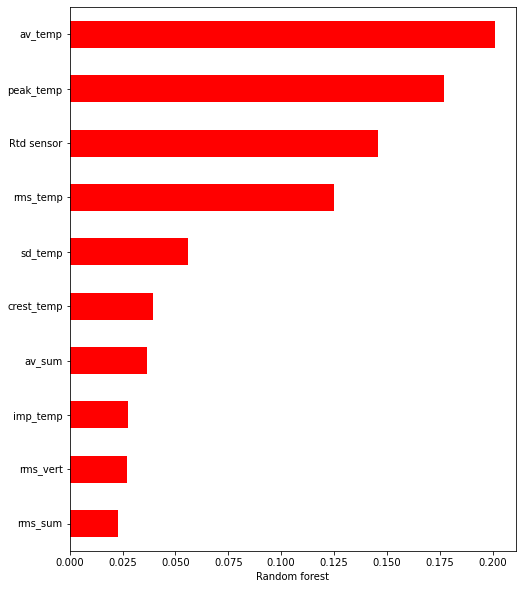

In [30]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [31]:
one_train

,index,Unnamed: 0_x,Horiz_acc,id_x,av_horiz,sd_horiz,peak_horiz,rms_horiz,skew_horiz,kurt_horiz,...,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp,RUL_y,id,time_group
0,0,15369.0,-0.606,1.0,-0.035885,0.305700,0.595,0.301904,-0.020307,-0.203469,...,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0,0.0
1,1,15379.0,0.283,1.0,-0.022923,0.311981,0.595,0.306780,-0.107927,-0.370114,...,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0,0.0
2,2,15389.0,-0.085,1.0,-0.040731,0.301209,0.595,0.298155,-0.030118,-0.132409,...,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0,0.0
3,3,15399.0,-0.216,1.0,-0.055154,0.300240,0.595,0.299531,0.104462,-0.093631,...,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0,0.0
4,4,15409.0,0.588,1.0,-0.026231,0.324570,0.595,0.319346,0.131074,-0.325532,...,63.640287,-0.025377,-1.241693,1.001630,1.001631,1.000001,1.001630,4270.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109563,109563,1110999.0,1.143,1.0,0.087846,1.105386,2.234,1.087474,-0.029527,-0.402650,...,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0,1.0
109564,109564,1111009.0,-0.119,1.0,0.085962,1.105708,2.234,1.087638,-0.024119,-0.405813,...,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0,1.0
109565,109565,1111019.0,1.270,1.0,0.207692,1.051802,2.234,1.052081,-0.054590,-0.347843,...,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0,1.0
109566,109566,1111029.0,1.201,1.0,0.289192,1.043148,2.234,1.062986,-0.218546,-0.253512,...,117.804503,0.058938,-1.378756,1.000395,1.000395,1.000000,1.000395,0.0,1.0,1.0


In [32]:
one_train = three_time_group(one_train)
one_test = three_time_group(one_test)
# one_train = one_train.reset_index()
# one_test = one_test.reset_index()
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

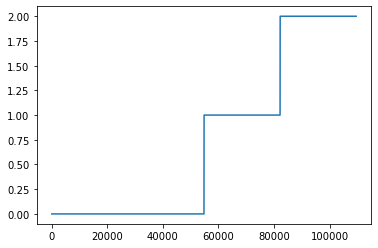

In [33]:
plt.plot(y_train)

In [34]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [35]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.992, accuracy testing: 0.529
F1 training: 0.992, F1 testing: 0.391


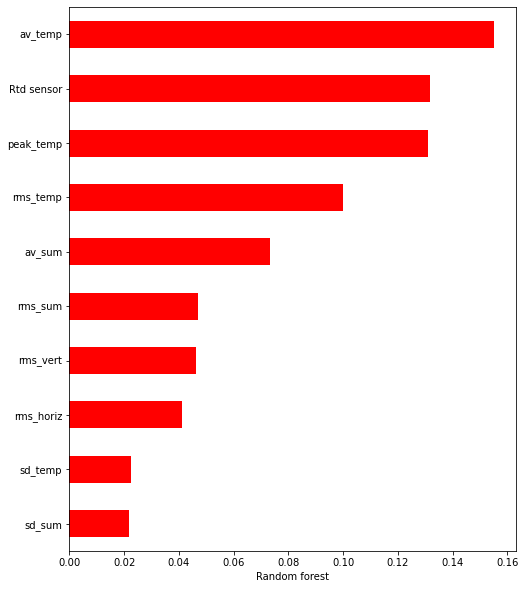

In [36]:
plot_features_weights('Random forest',rf.feature_importances_, X_train.columns)

In [37]:
one_train = four_time_group(one_train)
one_test = four_time_group(one_test)
#one_train = one_train.reset_index()
#one_test = one_test.reset_index()
X_train = one_train.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
X_test = one_test.drop(["index","Unnamed: 0_x","Unnamed: 0_y","RUL_x","RUL_y","round_RUL","id","id_x","id.1","id.2","time_group"], axis=1)
y_train = one_train["time_group"]
y_test = one_test["time_group"]

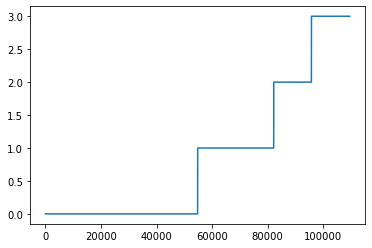

In [38]:
plt.plot(y_train)

In [39]:
rf = RandomForestClassifier(random_state=0,max_depth=6,n_estimators=50,min_samples_split=100,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
y_train.value_counts()

0.0    391163
1.0    195519
3.0     97824
2.0     97824
Name: time_group, dtype: int64

In [75]:
y_test.value_counts()

0.0    115328
1.0     57664
3.0     28928
2.0     28736
Name: time_group, dtype: int64

In [74]:
pd.DataFrame(y_train_predict)[0].value_counts()

0.0    541725
1.0    163224
3.0     73421
2.0      3960
Name: 0, dtype: int64

In [76]:
pd.DataFrame(y_test_predict)[0].value_counts()

0.0    230319
3.0       334
1.0         3
Name: 0, dtype: int64

In [40]:
y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_score = accuracy_score(y_train, y_train_predict)
test_score = accuracy_score(y_test, y_test_predict)
train_f1 = f1_score(y_train, y_train_predict,average="weighted")
test_f1 = f1_score(y_test, y_test_predict,average="weighted")
print('accuracy training: %.3f, accuracy testing: %.3f' % (
      (train_score), (test_score)))
print('F1 training: %.3f, F1 testing: %.3f' % (
      (train_f1), (test_f1)))

accuracy training: 0.990, accuracy testing: 0.500
F1 training: 0.990, F1 testing: 0.342


In [69]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
782326    3.0
782327    3.0
782328    3.0
782329    3.0
782330    3.0
Name: time_group, Length: 782330, dtype: float64

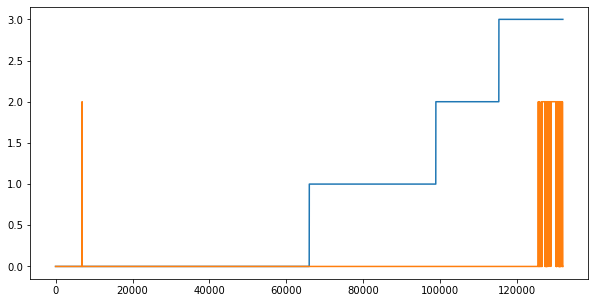

In [41]:
plt.figure(figsize=(10,5))
plt.plot(y_test)
plt.plot(y_test_predict)

In [ ]:
ans_df = pd.DataFrame(y_train)

In [ ]:
ans_df["rf_predict"] = y_train_predict

In [ ]:

train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]<500]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<500]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]<10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]<10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
y_train = ans_df[ans_df["RUL"]>10000]["RUL"]
y_train_predict = ans_df[ans_df["RUL"]>10000]["rf_predict"]
train_mape = mean_absolute_error(y_train, y_train_predict)
test_mape = mean_absolute_error(y_test, y_test_predict)
print('MAE training: %.3f, MAE testing: %.3f' % (
      (train_mape), (test_mape)))

In [ ]:
ans_df[ans_df["RUL"]>10000]

In [ ]:
plt.scatter(ans_df.index,ans_df["RUL"])

In [ ]:
plot_features_weights('Random Forest Regressor', rf.feature_importances_, X_train.columns)

In [ ]:
plot_residual('Random Forest Regressor',y_train, y_train_predict, y_test, y_test_predict)

In [ ]:
y_train

In [ ]:
y_train_predict 

In [ ]:
mean_absolute_percentage_error

In [ ]:
X_train.isnull().values.any()

In [ ]:
# 計算相關係數
corr = one_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.figure(figsize=(10,40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pd.DataFrame(corr["RUL"].sort_values(ascending=False)), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
plt.scatter(one_train["RUL"],one_train["p2ph_vert"])

In [ ]:
plt.scatter(one_train["RUL"],one_train["av_sum"])